In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('/kaggle/input/bacteria-itmo/databaseEcoli.csv')

In [3]:
data.sample(3)

,Compound,0.02 V,0.1 V,0.5 V,1V,5V
9448,10^6,-7.660000e-07,-0.000002,-0.000007,-0.000020,-0.00258
1924,10^5,-7.140000e-07,-0.000001,-0.000004,-0.000009,-0.00315
6089,10^6,-9.350000e-08,0.000001,0.000007,0.000013,0.00251


In [33]:
voltages = [0.02, 0.1, 0.5, 1, 5]

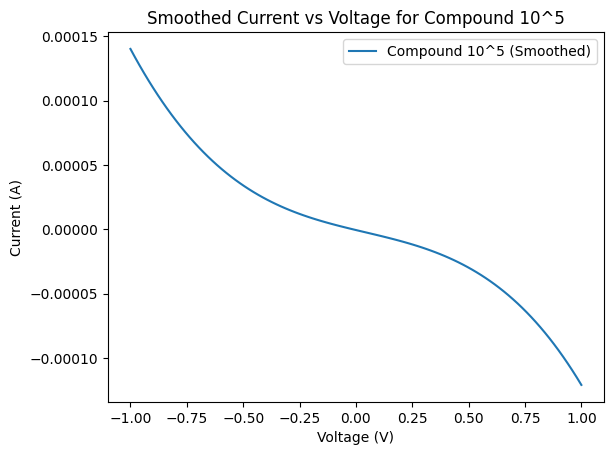

In [39]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.interpolate import CubicSpline

df = pd.read_csv('/kaggle/input/bacteria-itmo/databaseEcoli.csv')

# Define the desired voltage range
desired_voltages = np.linspace(-1, 1, 100)  # 100 points between -1V and 1V

# Interpolate the current values using a cubic spline
cs = CubicSpline(voltages, df.iloc[0, 1:].astype(float))
smoothed_currents = cs(desired_voltages)

# Plotting
plt.plot(desired_voltages, smoothed_currents, linestyle='-', label='Compound 10^5 (Smoothed)')

# Adding labels and title
plt.xlabel('Voltage (V)')
plt.ylabel('Current (A)')
plt.title('Smoothed Current vs Voltage for Compound 10^5')

# Display the plot
plt.legend()
plt.show()

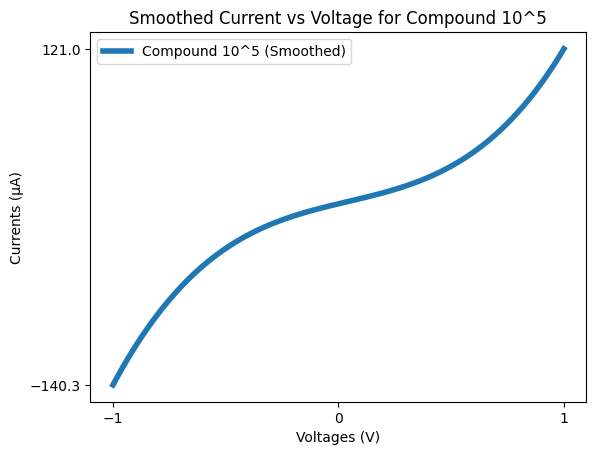

In [69]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from io import StringIO
from scipy.interpolate import CubicSpline


# Read the data into a Pandas DataFrame
df = pd.read_csv('/kaggle/input/bacteria-itmo/databaseEcoli.csv')

# Define the desired voltage range
desired_voltages = np.linspace(-1, 1, 100)  # 100 points between -1V and 1V

# Interpolate the current values using a cubic spline
cs = CubicSpline(voltages, -df.iloc[0, 1:].astype(float) * 10**6)  # Negate the current values
smoothed_currents = cs(desired_voltages)

# Plotting
plt.plot(desired_voltages, smoothed_currents, linestyle='-', linewidth=4, label='Compound 10^5 (Smoothed)')

# Adding labels and title
plt.xlabel('Voltages (V)')
plt.xticks(np.array([-1, 0, 1]))
plt.ylabel('Currents (μA)')
plt.yticks([smoothed_currents[0], smoothed_currents[-1]])
plt.title('Smoothed Current vs Voltage for Compound 10^5')

# Display the plot
plt.legend()
plt.show()

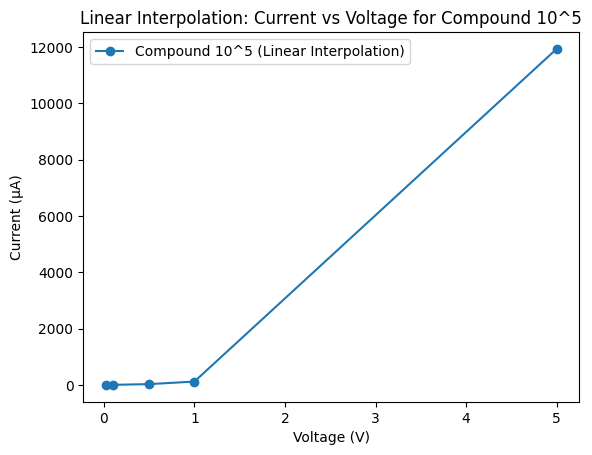

In [72]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from io import StringIO
from scipy.interpolate import interp1d


# Read the data into a Pandas DataFrame
df = pd.read_csv('/kaggle/input/bacteria-itmo/databaseEcoli.csv')

# Define the desired voltage range within the original data range
desired_voltages = np.array([0.02, 0.1, 0.5, 1, 5])  # Use original data voltages

# Interpolate the current values using linear interpolation
linear_interp = interp1d(voltages, -df.iloc[0, 1:].astype(float) * 1e6, kind='linear')  # Negate and multiply by 1e6
linear_smoothed_currents = linear_interp(desired_voltages)

# Plotting
plt.plot(desired_voltages, linear_smoothed_currents, marker='o', linestyle='-', label='Compound 10^5 (Linear Interpolation)')

# Adding labels and title
plt.xlabel('Voltage (V)')
plt.ylabel('Current (µA)')  # Display current in microamperes
plt.title('Linear Interpolation: Current vs Voltage for Compound 10^5')

# Display the plot
plt.legend() 
plt.show()